# Recitation 6 - Pandas aggregation and grouping

22/02/25
_Wode "Nimo" Ni_

First, let's load the [2021 stack overflow developer survey](https://insights.stackoverflow.com/survey/2021) data.

In [1]:
# imports and setup

import pandas as pd

pd.set_option('display.max_rows', 50)


In [2]:
# load original SO survey result
survey_result = pd.read_csv('stack-overflow-developer-survey-2021/survey_results_public.csv')
survey_result.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


Below is some data cleaning that Nimo had to painfully do, feel free to ask questions about this painful process if you are curious.

In [3]:
# years coding converstion
survey_result['YearsCode'] = pd.to_numeric(survey_result['YearsCode'], errors='coerce')
# split the string into lists
d = survey_result['LearnCode'].str.split(";")
# clean up null data
d.loc[d.isnull()] = d.loc[d.isnull()].apply(lambda x: [])
# find all survey options
survey_options = pd.Series(d).explode().unique().tolist()
# one hot encoding of the learn code question
learn_code_ans = pd.DataFrame(columns=survey_options)
for option in survey_options:
  learn_code_ans[option] = d.apply(lambda x: option in x)
survey_result = survey_result.join(learn_code_ans)

Let's do some basic aggregation functions:

In [4]:
# How many years have they been coding (mean, median)?
survey_result['YearsCode'].mean()

12.485721787402165

In [5]:
# What's the age distribution of developers (value counts)?
survey_result['Age'].value_counts()

25-34 years old       32568
18-24 years old       20993
35-44 years old       15183
45-54 years old        5472
Under 18 years old     5376
55-64 years old        1819
Prefer not to say       575
65 years or older       421
Name: Age, dtype: int64

In [6]:
# How does the first question break down by age (groupby)?
age_group = survey_result.groupby('Age')
pd.DataFrame(age_group['YearsCode'].mean())


,YearsCode
Age,
18-24 years old,5.796418
25-34 years old,10.372239
35-44 years old,19.444176
45-54 years old,29.385217
55-64 years old,35.628066
65 years or older,37.573427
Prefer not to say,11.279070
Under 18 years old,4.062889


So, what's this `groupby` magic? 
* Splitting : It is a process in which we split data into group by applying some conditions on datasets.
* Applying : It is a process in which we apply a function to each group independently
* Combining : It is a process in which we combine different datasets after applying groupby and results into a data structure

In [7]:
# Learning how to code, by age
pd.DataFrame(age_group["Age1stCode"].value_counts()).head(50)

Age1stCode
Age               Age1stCode                      
18-24 years old   11 - 17 years              13009
                  18 - 24 years               5638
                  5 - 10 years                2024
                  Younger than 5 years         287
                  25 - 34 years                 12
                  Older than 64 years            3
                  55 - 64 years                  2
                  35 - 44 years                  1
25-34 years old   11 - 17 years              16572
                  18 - 24 years              10058
                  25 - 34 years               2938
                  5 - 10 years                2685
                  Younger than 5 years         272
                  35 - 44 years                  9
                  Older than 64 years            4
35-44 years old   11 - 17 years               7248
                  5 - 10 years                3033
                  18 - 24 years               2761
                  35 - 44 years               1148
                  25 - 34 years                818
                  Younger than 5 years         147
                  45 - 54 years                  4
                  55 - 64 years                  4
                  Older than 64 years            2
45-54 years old   11 - 17 years               2819
                  5 - 10 years                1258
                  18 - 24 years                593
                  45 - 54 years                499
                  25 - 34 years                191
                  35 - 44 years                 90
                  Younger than 5 years          17
                  55 - 64 years                  2
                  Older than 64 years            1
55-64 years old   11 - 17 years                887
                  18 - 24 years                499
                  55 - 64 years                222
                  25 - 34 years                105
                  5 - 10 years                  41
                  35 - 44 years                 33
                  45 - 54 years                 23
                  Younger than 5 years           3
                  Older than 64 years            2
65 years or older 18 - 24 years                181
                  11 - 17 years                 97
                  25 - 34 years                 60
                  Older than 64 years           50
                  35 - 44 years                 12
                  55 - 64 years                  6
                  Younger than 5 years           6
                  45 - 54 years                  5

Now, let's see how people are learning how to code. I preprocessed the dataset so individual options are available for that survey question. The end goal is to re-create [this visualization](https://insights.stackoverflow.com/survey/2021#stack-overflow-site-use-so-comm-age).

In [10]:
survey_result
# survey_options

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Coding Bootcamp,"Other online resources (ex: videos, blogs, etc)",School,Online Forum,NaN,Friend or family member,Online Courses or Certification,Other (please specify):,Colleague,Books / Physical media
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,True,True,False,False,False,False,False,False,False,False
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7.0,...,False,True,True,False,False,False,False,False,False,False
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,False,True,False,True,False,False,False,False,False,False
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17.0,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,I am a developer by profession,Employed full-time,United States of America,Texas,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6.0,...,False,True,True,True,False,False,False,False,False,False
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4.0,...,False,True,True,True,False,False,True,False,False,True
83436,83437,I am a developer by profession,Employed full-time,United States of America,New Jersey,NaN,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10.0,...,False,False,True,False,False,False,False,False,False,False
83437,83438,I am a developer by profession,Employed full-time,Canada,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5.0,...,False,False,False,False,False,False,True,False,False,True


In [26]:
survey_df = survey_result.groupby('Age')[survey_options].sum()
normal_survey = survey_df.div(survey_df.sum(axis=1), axis=0)

# age_group["Coding Bootcamp", "Other online resources (ex: videos, blogs, etc)"].value_counts()

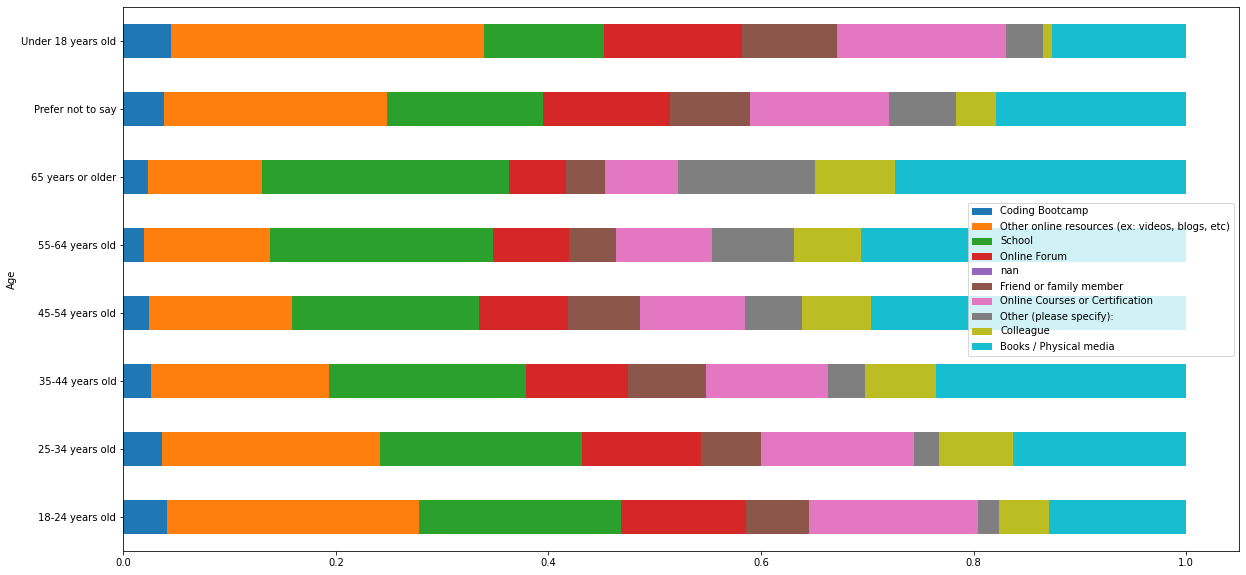

In [27]:
ax = normal_survey.plot.barh(stacked=True, figsize=(20,10))